In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the data

In [554]:
movies=pd.read_csv('train.csv')

In [555]:
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# EDA

In [556]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

### There are 3000 records in this dataset. There are missing values in many attributes. Not all attributes are required for the model.

# Removing unnecessary columns from the dataset

In [557]:
movies_reduce = movies.drop(columns=['id','belongs_to_collection','homepage','imdb_id','original_title','overview','poster_path','production_countries','release_date','spoken_languages','status','tagline','title','Keywords','crew'])

In [558]:
movies_reduce.head()

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


In [559]:
movies_reduce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
budget                  3000 non-null int64
genres                  2993 non-null object
original_language       3000 non-null object
popularity              3000 non-null float64
production_companies    2844 non-null object
runtime                 2998 non-null float64
cast                    2987 non-null object
revenue                 3000 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 187.6+ KB


In [560]:
movies_reduce.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
budget,3000,NaN,NaN,NaN,2.25313e+07,3.70261e+07,0,0,8e+06,2.9e+07,3.8e+08
genres,2993,872,"[{'id': 18, 'name': 'Drama'}]",266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,3000,36,en,2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,3000,NaN,NaN,NaN,8.46327,12.104,1e-06,4.01805,7.37486,10.891,294.337
production_companies,2844,2383,"[{'name': 'Paramount Pictures', 'id': 4}]",51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,2998,NaN,NaN,NaN,107.857,22.0864,0,94,104,118,338
cast,2987,2975,[],13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,3000,NaN,NaN,NaN,6.67259e+07,1.37532e+08,1,2.37981e+06,1.68071e+07,6.89192e+07,1.51956e+09


# The attributes budget, popularity and revenue has outliers 

# Data pre-processing

### Consider only first 2 values of genre for model

In [561]:
import json
lst_genre = []
lst_genre2 = []

for row in movies_reduce['genres']:
    if str(row).strip('[]') !='nan':
        d=eval(str(row).strip('[]'))
        if str(type(d)) == "<class 'dict'>":
            lst_genre.append(str(d['id']))
            lst_genre2.append(str(0)) 
            #print(d['id'])
        else:
            idlist1=''
            idlist2=''
            for i in range(2):
                if (i == 0 and str(d[i]['id'])):
                    lst_genre.append(str(d[i]['id']))
                else:
                    if (i == 1 and str(d[i]['id'])):
                        idlist2 = str(d[i]['id']) 
                        lst_genre2.append(str(d[i]['id']))  
                    else:
                        if i == 1:
                            lst_genre2.append(str(0)) 
                            
    else:
        lst_genre.append(str(0)) 
        lst_genre2.append(str(0)) 
        
df_genre = pd.DataFrame(lst_genre) 
df_genre2 = pd.DataFrame(lst_genre2) 
df_genre.columns=['genre1']
df_genre2.columns=['genre2']

In [562]:
df_genre2.head()

,genre2
0,0
1,18
2,0
3,18
4,53


In [563]:
#from sklearn.feature_extraction.text import CountVectorizer
#v=CountVectorizer()
#new_df_genre=v.fit_transform(df_genre['genre'])
#new_df_genre

In [564]:
#print(v.get_feature_names())

In [565]:
#df_genre_fin=pd.DataFrame(new_df_genre.toarray())
#genre_col_nm=[]
#for i in v.get_feature_names():
 #   genre_col_nm.append('genre_' + i)
#df_genre_fin.columns=genre_col_nm    

### Consider only one value for production co

In [566]:
lst_prodco = []
for row in movies_reduce['production_companies']:
    if str(row).strip('[]') !='nan':
        d=eval(str(row).strip('[]'))
        if str(type(d)) == "<class 'dict'>":
            lst_prodco.append(str(d['id']))
           # print(d['id'])
        else:
            idlist=''
            #print(str(len(d)))
            for i in range(1):
                idlist = idlist + ',' + str(d[i]['id'])
                #print(idlist)
            lst_prodco.append(str(idlist[1:]))
    else:
        lst_prodco.append(str(0)) 
        
df_prodco = pd.DataFrame(lst_prodco) 
df_prodco.columns=['prodco']

In [567]:
df_prodco.head()

,prodco
0,4
1,2
2,2266
3,0
4,0


In [568]:
#v1=CountVectorizer()
#new_df_prodco=v1.fit_transform(df_prodco['prodco'])
#new_df_prodco

In [569]:
#print(len(v1.get_feature_names()))

In [570]:
#df_prodco_fin=pd.DataFrame(new_df_prodco.toarray())
#prodco_col_nm=[]
#for i in v1.get_feature_names():
#    prodco_col_nm.append('prodco_' + i)
#df_prodco_fin.columns=prodco_col_nm   

### Creating only 2 values for cast

In [571]:

lst_cast = []
lst_cast2 = []

for row in movies_reduce['cast']:
    #print(type(row))
    #if (row != '' and row != 'nan'):
    if (str(type(row)) == "<class 'str'>"):
        #print(row)
        #lst_cast.append(str(row).strip('[]'))
        #print(eval(row))
        d=eval(row)
        #print(str(type(d)))
        if len(d) == 0: #str(type(d)) == "<class 'int'>":
            #lst_cast.append(str(d['id']))
             lst_cast.append(str(0)) 
             lst_cast2.append(str(0)) 
        if len(d) == 1: #str(type(d)) == "<class 'int'>":
             lst_cast.append(str(d[0]['id'])) 
             lst_cast2.append(str(0)) 

        else:
            if len(d) > 1:
            #print(str(row).strip('[]'))
            #print(len(d))
                for i in range(2):
                #print(d[i]['id'])    
                    if  (i == 0 and str(d[i]['id'])):
                        lst_cast.append(str(d[i]['id']))
                else:
                    if (i == 1 and str(d[i]['id'])):
                        lst_cast2.append(str(d[i]['id']))
                    else:
                        if i == 1:
                            lst_cast2.append(str(0))
    else:
        lst_cast.append(str(0)) 
        lst_cast2.append(str(0)) 
        
df_cast = pd.DataFrame(lst_cast) 
df_cast.columns=['cast1']  
df_cast2 = pd.DataFrame(lst_cast2) 
df_cast2.columns=['cast2']  


In [572]:
#from sklearn.feature_extraction.text import CountVectorizer
#v2=CountVectorizer()
#new_df_cast=v2.fit_transform(df_cast['cast'])
#new_df_cast

In [573]:
#print(len(v2.get_feature_names()))

In [574]:
#new_df_cast

In [575]:
#df_cast_fin=pd.DataFrame(new_df_cast.toarray())
#cast_col_nm=[]
#for i in v2.get_feature_names():
#    cast_col_nm.append('cast_' + i)
#df_cast_fin.columns=cast_col_nm   

In [576]:
#df_cast_fin.head()

# EDA

In [577]:
movies_reduce.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


# Handling outliers

In [578]:
movies_reduce['budget'].std()

37026086.41198744

In [579]:
movies_reduce['budget'].median() + (movies_reduce['budget'].std()*2)

82052172.82397488

### Movies with budget > 2 standard deviation away from mean, replacing it with median

In [580]:
movies_reduce[movies_reduce['budget'] > (movies_reduce['budget'].median() + (movies_reduce['budget'].std()*2))]

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue
14,102000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,20.666063,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...",145.0,"[{'cast_id': 5, 'character': 'Chief John Ander...",358372926
32,90000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,13.412445,"[{'name': 'Summit Entertainment', 'id': 491}, ...",106.0,"[{'cast_id': 0, 'character': 'Kaulder', 'credi...",146936910
34,140000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,9.718111,"[{'name': 'New Line Cinema', 'id': 12}]",91.0,"[{'cast_id': 2, 'character': 'Det. James Carte...",258022233
57,125000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.038824,"[{'name': 'PolyGram Filmed Entertainment', 'id...",125.0,"[{'cast_id': 4, 'character': 'Bruce Wayne / Ba...",238207122
60,150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,23.065078,"[{'name': 'Eon Productions', 'id': 7576}, {'na...",144.0,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",599045960
69,85000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,2.238808,"[{'name': 'Universal Pictures', 'id': 33}]",104.0,"[{'cast_id': 12, 'character': 'Sean Boswell', ...",158468292
112,100000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",en,11.696923,"[{'name': 'Imagine Entertainment', 'id': 23}, ...",122.0,"[{'cast_id': 2, 'character': 'Owen Chase', 'cr...",93820758
114,93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,32.070725,"[{'name': 'WingNut Films', 'id': 11}, {'name':...",178.0,"[{'cast_id': 28, 'character': 'Frodo Baggins',...",871368364
120,90000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,8.345985,"[{'name': 'New Line Cinema', 'id': 12}]",90.0,"[{'cast_id': 10, 'character': 'Det. James Cart...",347325802
121,150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",en,12.453452,"[{'name': 'Walt Disney Pictures', 'id': 2}]",88.0,"[{'cast_id': 9, 'character': 'Tarzan', 'credit...",448000000


In [581]:
#movies_reduce[movies_reduce['budget'] > (movies_reduce['budget'].median() + (movies_reduce['budget'].std()*2))].budget
def replace_budget(x):
    if x > (movies_reduce['budget'].median() + (movies_reduce['budget'].std()*2)):
        return movies_reduce['budget'].median()
    else:
        return x

In [582]:
#movies_reduce['budget']=movies_reduce['budget'].apply(replace_budget)

In [583]:
movies_reduce.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


### Movies with budget = 0, replacing it with median

In [584]:
def replace_budget1(x):
    if x == 0:
        return movies_reduce['budget'].median()
    else:
        return x

In [585]:
movies_reduce[movies_reduce['budget'] ==0 ]

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970
7,0,"[{'id': 99, 'name': 'Documentary'}]",en,1.949044,NaN,84.0,"[{'cast_id': 2, 'character': 'Himself', 'credi...",2586511
8,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",100.0,"[{'cast_id': 1, 'character': 'Long John Silver...",34327391
11,0,"[{'id': 35, 'name': 'Comedy'}]",en,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,98.0,"[{'cast_id': 2, 'character': 'Lewis Skolnick',...",22642033
17,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,4.183558,"[{'name': 'BBC Films', 'id': 288}, {'name': 'H...",111.0,"[{'cast_id': 7, 'character': 'Charles Dickens'...",1234254
22,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",en,7.820787,"[{'name': 'The Collective', 'id': 15156}, {'na...",116.0,"[{'cast_id': 1, 'character': 'Gary', 'credit_i...",100345
23,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",en,1.323333,"[{'name': '\xa0Braeburn Entertainment', 'id': ...",92.0,"[{'cast_id': 1037, 'character': 'Det. Canto', ...",17011
24,0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",en,7.434577,"[{'name': 'New Zealand Film Commission', 'id':...",87.0,"[{'cast_id': 9, 'character': 'Henry Oldfield',...",4947717
25,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",en,1.252367,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",95.0,"[{'cast_id': 2, 'character': 'Dr. Evan Rendell...",8403433
31,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",fr,5.695860,"[{'name': 'Les Films du Losange', 'id': 223}, ...",117.0,"[{'cast_id': 2, 'character': 'Georges Laurent'...",36000000


In [586]:
movies_reduce['budget']=movies_reduce['budget'].apply(replace_budget1)
    
#movies_reduce.replace([movies_reduce['budget'] ==0')

In [587]:
movies_reduce[movies_reduce['budget'] ==0 ]

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue


# Movies with popularity 2 standard deviations away from mean, replace it with median

In [588]:
movies_reduce.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.469667e+07,8.463274,107.856571,6.672585e+07
std,3.586030e+07,12.104000,22.086434,1.375323e+08
min,1.000000e+00,0.000001,0.000000,1.000000e+00
25%,8.000000e+06,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [589]:
movies_reduce['popularity'].median()

7.3748615

In [590]:
movies_reduce['popularity'].std()

12.104000034585484

In [591]:
movies_reduce[movies_reduce['popularity'] > (movies_reduce['popularity'].median() + (movies_reduce['popularity'].std()*2))]

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue
2,3300000.0,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
114,93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,32.070725,"[{'name': 'WingNut Films', 'id': 11}, {'name':...",178.0,"[{'cast_id': 28, 'character': 'Frodo Baggins',...",871368364
518,149000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,294.337037,"[{'name': 'Dune Entertainment', 'id': 444}, {'...",141.0,NaN,820580447
684,160000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,287.253654,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",129.0,"[{'cast_id': 174, 'character': 'Belle', 'credi...",1262886337
934,40000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",en,49.247505,"[{'name': 'Thunder Road Pictures', 'id': 3528}...",122.0,NaN,171539887
1093,6000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,41.109264,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",175.0,"[{'cast_id': 5, 'character': 'Don Vito Corleon...",245066411
1126,220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,89.887648,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",143.0,"[{'cast_id': 46, 'character': 'Tony Stark / Ir...",1519557910
1140,20000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",it,39.394970,"[{'name': 'Miramax Films', 'id': 14}, {'name':...",116.0,"[{'cast_id': 7, 'character': 'Dora', 'credit_i...",229400000
1309,61000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",en,154.801009,[{'name': 'Twentieth Century Fox Film Corporat...,145.0,"[{'cast_id': 7, 'character': 'Nick Dunne', 'cr...",369330363
1354,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",en,37.484577,"[{'name': 'Pandemonium', 'id': 8915}, {'name':...",99.0,"[{'cast_id': 18, 'character': 'Dylan Branson',...",422


In [592]:
def replace_popularity(x):
    if x > (movies_reduce['popularity'].median() + (movies_reduce['popularity'].std()*2)):
        return movies_reduce['popularity'].median()
    else:
        return x

In [593]:
#movies_reduce['popularity']=movies_reduce['popularity'].apply(replace_popularity)

In [594]:
movies_reduce.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.469667e+07,8.463274,107.856571,6.672585e+07
std,3.586030e+07,12.104000,22.086434,1.375323e+08
min,1.000000e+00,0.000001,0.000000,1.000000e+00
25%,8.000000e+06,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [595]:
movies_reduce[movies_reduce['popularity'] == 0]

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue


# Replace records where runtime =0 with median

In [596]:
movies_reduce[movies_reduce['runtime'] == 0]

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue
390,6843500.0,"[{'id': 35, 'name': 'Comedy'}]",it,3.800073,"[{'name': 'Colorado Film Production', 'id': 10...",0.0,"[{'cast_id': 2, 'character': 'Alberto', 'credi...",10703234
591,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",ru,0.402368,"[{'name': 'Роскинопрокат', 'id': 14650}, {'nam...",0.0,"[{'cast_id': 8, 'character': '', 'credit_id': ...",234748
924,8000000.0,"[{'id': 35, 'name': 'Comedy'}]",es,1.926826,"[{'name': 'Televisión Española (TVE)', 'id': 6...",0.0,"[{'cast_id': 3, 'character': 'David', 'credit_...",850259
977,11000000.0,"[{'id': 35, 'name': 'Comedy'}]",it,5.010563,"[{'name': 'Colorado Film Production', 'id': 10...",0.0,"[{'cast_id': 4, 'character': 'Paolo', 'credit_...",12935800
1255,8000000.0,"[{'id': 37, 'name': 'Western'}]",it,1.623440,[{'name': 'Compagnia Cinematografica Champion'...,0.0,"[{'cast_id': 14, 'character': 'Onion Stark', '...",39598448
1541,750000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",ru,0.201582,"[{'name': 'Кинокомпания «Lunapark»', 'id': 420...",0.0,"[{'cast_id': 3, 'character': 'Viktor', 'credit...",3
1874,8000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,0.229233,NaN,0.0,"[{'cast_id': 2, 'character': 'Murat Hoxha', 'c...",1
2150,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 10749, '...",ru,0.414793,"[{'name': 'Kinokompaniya CTB', 'id': 886}]",0.0,"[{'cast_id': 2, 'character': 'Sasha', 'credit_...",3919731
2498,3500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",ru,0.884241,NaN,0.0,"[{'cast_id': 10, 'character': 'Vampire', 'cred...",2294357
2645,8000000.0,"[{'id': 10749, 'name': 'Romance'}]",en,0.504000,"[{'name': 'Enlight Pictures', 'id': 4053}]",0.0,"[{'cast_id': 0, 'character': 'Zhou Xiao Zhi', ...",76000000


In [597]:
def replace_runtime(x):
    if x == 0:
        return movies_reduce['runtime'].median()
    else:
        return x

In [598]:
movies_reduce['runtime']=movies_reduce['runtime'].apply(replace_runtime)

In [599]:
movies_reduce.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.469667e+07,8.463274,108.272849,6.672585e+07
std,3.586030e+07,12.104000,21.002811,1.375323e+08
min,1.000000e+00,0.000001,11.000000,1.000000e+00
25%,8.000000e+06,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [600]:
def replace_runtime1(x):
    if x > (movies_reduce['runtime'].median() + (movies_reduce['runtime'].std()*2)):
        return movies_reduce['runtime'].median()
    else:
        return x

In [601]:
#movies_reduce['runtime']=movies_reduce['runtime'].apply(replace_runtime1)

In [602]:
movies_reduce.describe(include = 'all')

,budget,genres,original_language,popularity,production_companies,runtime,cast,revenue
count,3.000000e+03,2993,3000,3000.000000,2844,2998.000000,2987,3.000000e+03
unique,NaN,872,36,NaN,2383,NaN,2975,NaN
top,NaN,"[{'id': 18, 'name': 'Drama'}]",en,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]",NaN,[],NaN
freq,NaN,266,2575,NaN,51,NaN,13,NaN
mean,2.469667e+07,NaN,NaN,8.463274,NaN,108.272849,NaN,6.672585e+07
std,3.586030e+07,NaN,NaN,12.104000,NaN,21.002811,NaN,1.375323e+08
min,1.000000e+00,NaN,NaN,0.000001,NaN,11.000000,NaN,1.000000e+00
25%,8.000000e+06,NaN,NaN,4.018053,NaN,94.000000,NaN,2.379808e+06
50%,8.000000e+06,NaN,NaN,7.374861,NaN,104.000000,NaN,1.680707e+07
75%,2.900000e+07,NaN,NaN,10.890983,NaN,118.000000,NaN,6.891920e+07


# Merge the seperate dataframes into one

In [603]:
movies_fin=movies_reduce.drop(columns=['genres','cast','production_companies'])

In [604]:
movies_fin=movies_fin.join(df_genre)

In [605]:
movies_fin=movies_fin.join(df_genre2)

In [606]:
movies_fin=movies_fin.join(df_cast)

In [607]:
movies_fin=movies_fin.join(df_cast2)

In [608]:
movies_fin=movies_fin.join(df_prodco)

In [609]:
movies_fin.head()

,budget,original_language,popularity,runtime,revenue,genre1,genre2,cast1,cast2,prodco
0,14000000.0,en,6.575393,93.0,12314651,35,0,52997,64342,4
1,40000000.0,en,8.248895,113.0,95149435,35,18,1813,5823,2
2,3300000.0,en,64.299990,105.0,13092000,18,0,996701,18999,2266
3,1200000.0,hi,3.174936,122.0,16000000,53,18,35068,85047,0
4,8000000.0,ko,1.148070,118.0,3923970,28,53,84751,64453,0


In [610]:
l1=LabelEncoder()
movies_fin['original_language']=l1.fit_transform(movies_fin['original_language'])

In [611]:
movies_fin['original_language'].head()

0     7
1     7
2     7
3    13
4    18
Name: original_language, dtype: int32

In [612]:
movies_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
budget               3000 non-null float64
original_language    3000 non-null int32
popularity           3000 non-null float64
runtime              2998 non-null float64
revenue              3000 non-null int64
genre1               3000 non-null object
genre2               3000 non-null object
cast1                3000 non-null object
cast2                3000 non-null object
prodco               3000 non-null object
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 222.7+ KB


In [613]:
movies_fin.head()

,budget,original_language,popularity,runtime,revenue,genre1,genre2,cast1,cast2,prodco
0,14000000.0,7,6.575393,93.0,12314651,35,0,52997,64342,4
1,40000000.0,7,8.248895,113.0,95149435,35,18,1813,5823,2
2,3300000.0,7,64.299990,105.0,13092000,18,0,996701,18999,2266
3,1200000.0,13,3.174936,122.0,16000000,53,18,35068,85047,0
4,8000000.0,18,1.148070,118.0,3923970,28,53,84751,64453,0


In [614]:
movies_fin=movies_fin.fillna(0)

In [615]:
movies_fin['genre1']=movies_fin['genre1'].astype('float')
movies_fin['genre2']=movies_fin['genre2'].astype('float')
movies_fin['cast1']=movies_fin['cast1'].astype('float')
movies_fin['cast2']=movies_fin['cast2'].astype('float')
movies_fin['prodco']=movies_fin['prodco'].astype('float')

In [616]:
movies_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
budget               3000 non-null float64
original_language    3000 non-null int32
popularity           3000 non-null float64
runtime              3000 non-null float64
revenue              3000 non-null int64
genre1               3000 non-null float64
genre2               3000 non-null float64
cast1                3000 non-null float64
cast2                3000 non-null float64
prodco               3000 non-null float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 222.7 KB


# Inspect the correlation the attributes

In [617]:
#movies_fin=movies_fin[movies_fin['original_language'] == 7]

In [618]:
corr=movies_fin.corr()

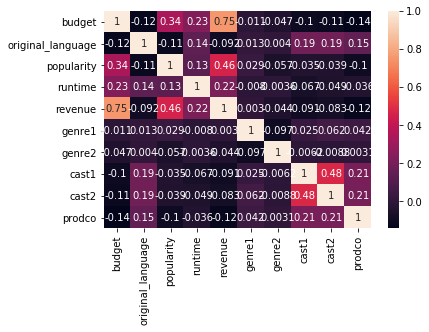

In [619]:
sns.heatmap(corr, annot=True)

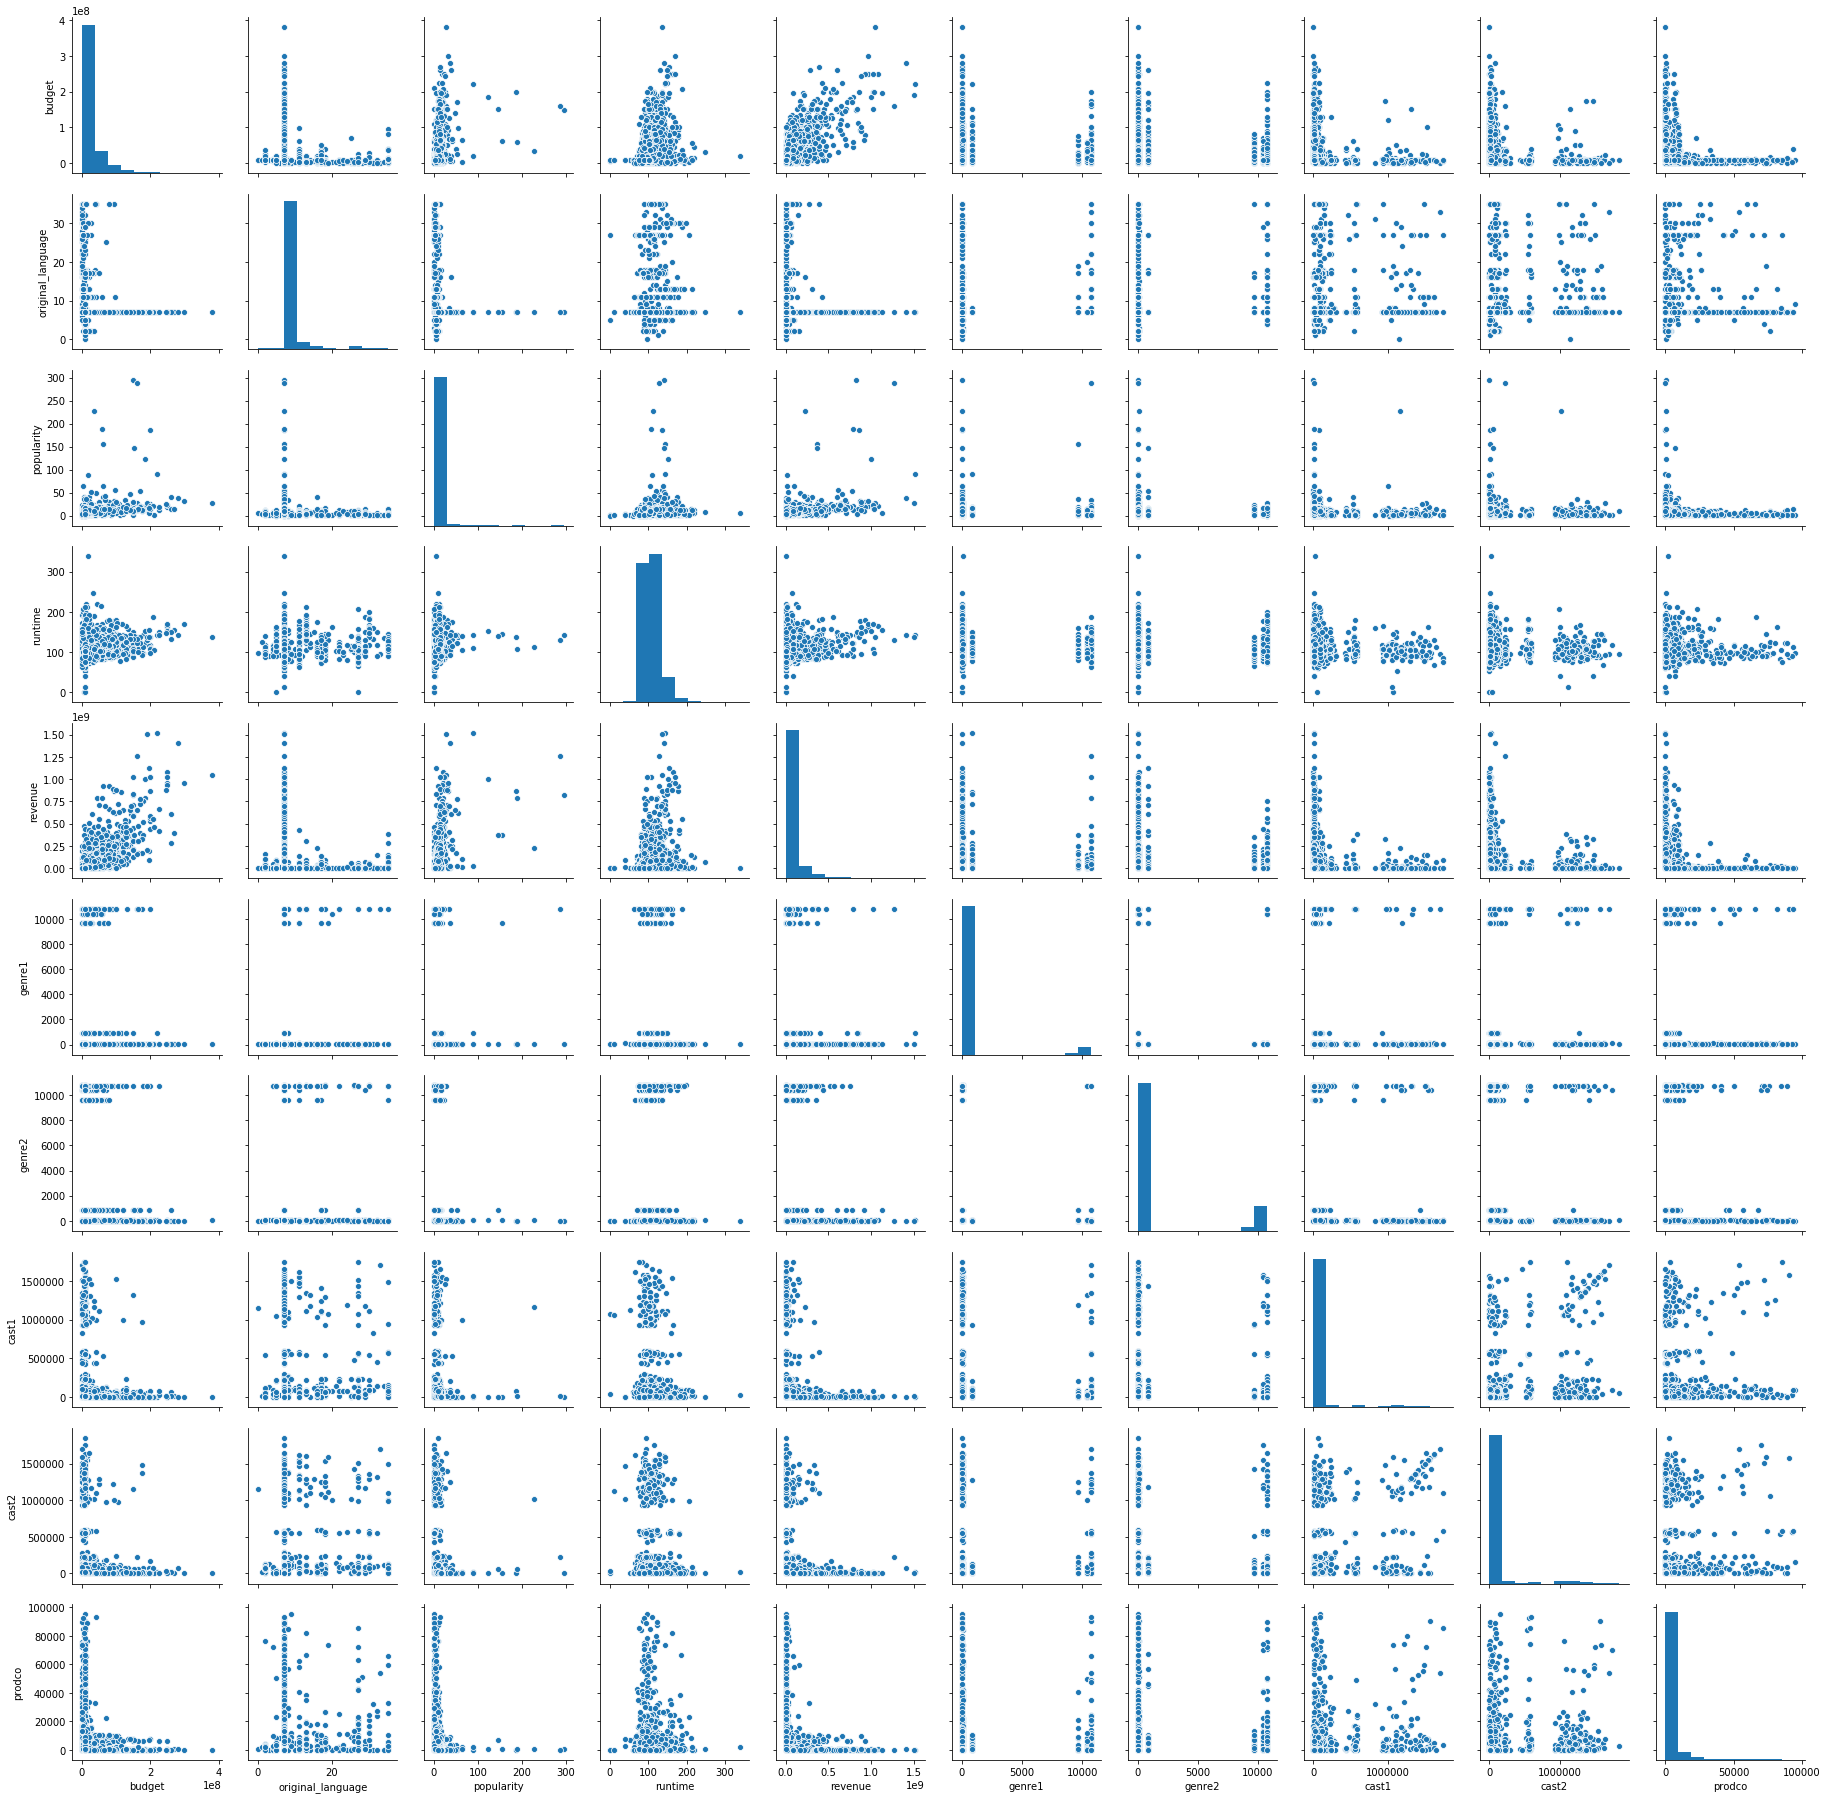

In [620]:
sns.pairplot(movies_fin)

### Budget and Popularity are the attributes that have an impact on the revenue. Lets use these attributes for building our model.

In [621]:
y_train=movies_fin.pop('revenue')
X_train=movies_fin
#.drop(columns=['original_language','runtime','genre1','genre2','cast1','cast2','prodco','popularity'])


In [622]:
X_train.head()

,budget,original_language,popularity,runtime,genre1,genre2,cast1,cast2,prodco
0,14000000.0,7,6.575393,93.0,35.0,0.0,52997.0,64342.0,4.0
1,40000000.0,7,8.248895,113.0,35.0,18.0,1813.0,5823.0,2.0
2,3300000.0,7,64.299990,105.0,18.0,0.0,996701.0,18999.0,2266.0
3,1200000.0,13,3.174936,122.0,53.0,18.0,35068.0,85047.0,0.0
4,8000000.0,18,1.148070,118.0,28.0,53.0,84751.0,64453.0,0.0


In [623]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_train_std=std.fit_transform(X_train)


In [624]:
from sklearn.model_selection import train_test_split
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_std, y_train, test_size=0.3)

In [625]:
X_train_fin.shape

(2100, 9)

In [626]:
X_val.shape

(900, 9)

In [627]:
y_train_fin.shape

(2100,)

In [628]:
y_val.shape

(900,)

# Testing Linear Regression

In [629]:
from sklearn.linear_model import LinearRegression

In [630]:
lin = LinearRegression(n_jobs=300, normalize = True)
lin.fit(X_train_fin, y_train_fin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=300, normalize=True)

In [631]:
y_pred=lin.predict(X_val)

In [632]:
y_pred.shape

(900,)

In [633]:
X_val.shape

(900, 9)

In [634]:
lin.coef_

array([ 9.02073317e+07,  2.48632561e+06,  3.75798489e+07,  5.52617338e+06,
        1.81464306e+05, -8.14124929e+04, -1.91269648e+06, -2.02805414e+04,
        3.83261371e+05])

In [635]:
lin.intercept_

66549006.145453595

In [636]:
lin.score(X_train_fin, y_train_fin)

0.5967661747634425

In [637]:
lin.score(X_val, y_val)

0.6521146230847081

In [638]:
X_test=pd.read_csv('test.csv')

In [639]:
X_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [640]:
X_test_reduce = X_test.drop(columns=['id','belongs_to_collection','homepage','imdb_id','original_title','overview','poster_path','production_countries','release_date','spoken_languages','status','tagline','title','Keywords','crew'])

In [641]:
X_test_reduce.head()

,budget,genres,original_language,popularity,production_companies,runtime,cast
0,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,3.851534,NaN,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_..."
1,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc..."
2,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi..."
3,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...",130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_..."
4,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,3.217680,NaN,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)..."


In [642]:
import json
lst_genre3 = []
lst_genre4 = []

for row in X_test_reduce['genres']:
    if str(row).strip('[]') !='nan':
        d=eval(str(row).strip('[]'))
        if str(type(d)) == "<class 'dict'>":
            lst_genre3.append(str(d['id']))
            lst_genre4.append(str(0)) 
            #print(d['id'])
        else:
            idlist1=''
            idlist2=''
            for i in range(2):
                if (i == 0 and str(d[i]['id'])):
                    lst_genre3.append(str(d[i]['id']))
                else:
                    if (i == 1 and str(d[i]['id'])):
                        idlist2 = str(d[i]['id']) 
                        lst_genre4.append(str(d[i]['id']))  
                    else:
                        if i == 1:
                            lst_genre4.append(str(0)) 
                            
    else:
        lst_genre3.append(str(0)) 
        lst_genre4.append(str(0)) 
        
df_genre3 = pd.DataFrame(lst_genre) 
df_genre4 = pd.DataFrame(lst_genre2) 
df_genre3.columns=['genre1']
df_genre4.columns=['genre2']

In [643]:
df_genre4.head()

,genre2
0,0
1,18
2,0
3,18
4,53


In [644]:
lst_cast3 = []
lst_cast4 = []

for row in X_test_reduce['cast']:
    #print(type(row))
    #if (row != '' and row != 'nan'):
    if (str(type(row)) == "<class 'str'>"):
        #print(row)
        #lst_cast.append(str(row).strip('[]'))
        #print(eval(row))
        d=eval(row)
        #print(str(type(d)))
        if len(d) == 0: #str(type(d)) == "<class 'int'>":
            #lst_cast.append(str(d['id']))
             lst_cast3.append(str(0)) 
             lst_cast4.append(str(0)) 
        if len(d) == 1: #str(type(d)) == "<class 'int'>":
             lst_cast3.append(str(d[0]['id'])) 
             lst_cast4.append(str(0)) 

        else:
            if len(d) > 1:
            #print(str(row).strip('[]'))
            #print(len(d))
                for i in range(2):
                #print(d[i]['id'])    
                    if  (i == 0 and str(d[i]['id'])):
                        lst_cast3.append(str(d[i]['id']))
                else:
                    if (i == 1 and str(d[i]['id'])):
                        lst_cast4.append(str(d[i]['id']))
                    else:
                        if i == 1:
                            lst_cast4.append(str(0))
    else:
        lst_cast3.append(str(0)) 
        lst_cast4.append(str(0)) 
        
df_cast3 = pd.DataFrame(lst_cast3) 
df_cast3.columns=['cast1']  
df_cast4 = pd.DataFrame(lst_cast4) 
df_cast4.columns=['cast2']  


In [645]:
df_cast4.head()

,cast2
0,111768
1,108299
2,4756
3,84573
4,71766


In [646]:
lst_prodco2 = []
for row in X_test_reduce['production_companies']:
    if str(row).strip('[]') !='nan':
        d=eval(str(row).strip('[]'))
        if str(type(d)) == "<class 'dict'>":
            lst_prodco2.append(str(d['id']))
           # print(d['id'])
        else:
            idlist=''
            #print(str(len(d)))
            for i in range(1):
                idlist = idlist + ',' + str(d[i]['id'])
                #print(idlist)
            lst_prodco2.append(str(idlist[1:]))
    else:
        lst_prodco2.append(str(0)) 
        
df_prodco2 = pd.DataFrame(lst_prodco2) 
df_prodco2.columns=['prodco']

In [647]:
df_prodco2.head()

,prodco
0,0
1,9233
2,6194
3,313
4,0


In [648]:
X_test_fin=X_test_reduce.drop(columns=['genres','cast','production_companies'])


In [649]:
X_test_fin=X_test_fin.join(df_genre3)
X_test_fin=X_test_fin.join(df_genre4)
X_test_fin=X_test_fin.join(df_cast3)
X_test_fin=X_test_fin.join(df_cast4)
X_test_fin=X_test_fin.join(df_prodco2)
X_test_fin.head()

,budget,original_language,popularity,runtime,genre1,genre2,cast1,cast2,prodco
0,0,ja,3.851534,90.0,35,0,82140,111768,0
1,88000,en,3.559789,65.0,35,18,104412,108299,9233
2,0,en,8.085194,100.0,18,0,5344,4756,6194
3,6800000,fr,8.596012,130.0,53,18,77498,84573,313
4,2000000,en,3.217680,92.0,28,53,2778,71766,0


In [650]:
X_test_fin['original_language']=l1.fit_transform(X_test_fin['original_language'])

In [651]:
X_test_fin.head()

,budget,original_language,popularity,runtime,genre1,genre2,cast1,cast2,prodco
0,0,19,3.851534,90.0,35,0,82140,111768,0
1,88000,9,3.559789,65.0,35,18,104412,108299,9233
2,0,9,8.085194,100.0,18,0,5344,4756,6194
3,6800000,12,8.596012,130.0,53,18,77498,84573,313
4,2000000,9,3.217680,92.0,28,53,2778,71766,0


In [652]:
X_test_fin=X_test_fin.fillna(0)

In [653]:
#X_test_fin=X_test_fin[['budget','popularity']]

In [654]:
X_test_fin.shape

(4398, 9)

In [655]:
X_train_fin.shape

(2100, 9)

In [656]:
y_test_pred=lin.predict(X_test_fin)

In [ ]:
df_test=pd.DataFrame(X_test['id'])

In [ ]:
df_test=df_test.join(pd.DataFrame(y_test_pred))

In [ ]:
df_test.columns=['id','revenue']

In [ ]:
#df_test.head()

In [ ]:
#df_test.to_csv('sub2.csv', index=False)

# SGD

In [659]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train_fin, y_train_fin)
sgd.score(X_train_fin, y_train_fin)

0.5964356743977818

In [661]:
sgd.score(X_val, y_val)

0.6539589677871396

# KNN

In [674]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_fin, y_train_fin)
knn.score(X_train_fin, y_train_fin)

0.6789345458016025

In [675]:
knn.score(X_val, y_val)

0.6751155523992265

In [676]:
y_test_pred=knn.predict(X_test_fin)

In [677]:
df_test=pd.DataFrame(X_test['id'])

In [678]:
df_test=df_test.join(pd.DataFrame(y_test_pred))

In [679]:
df_test.columns=['id','revenue']

In [680]:
df_test.to_csv('sub3.csv', index=False)

# Testing Lasso

In [662]:
from sklearn.linear_model import Lasso

In [663]:
las = Lasso()

In [664]:
las.fit(X_train_fin, y_train_fin)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [665]:
las.score(X_train_fin, y_train_fin)

0.596766174763442

In [666]:
las.score(X_val, y_val)

0.6521146262406503

# Testing Ridge

In [667]:
from sklearn.linear_model import Ridge

In [668]:
rid = Ridge()

In [669]:
rid.fit(X_train_fin, y_train_fin)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [670]:
rid.score(X_train_fin, y_train_fin)

0.5967660474935361

In [671]:
rid.score(X_val, y_val)

0.6521365959559302

# Building a neural network

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [ ]:
model=Sequential()
model.add(Dense(50, input_dim=4, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))

model.add(Dense(output_dim=1, activation='linear'))

opt = Adam(lr=0.005, decay=0.01)

model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
model.fit(X_train_fin, y_train_fin, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)